McKinsey&Company Prohack
This is an anonymized dataset provided by the one of the most prestigious consulting companies around the
world that operate in many countries including Azerbaijan.

## - McKinsey&Company Prohack

###   Achieve Singularity

“Beeep…Beeeep….Beeeep… Hooomans*, are you there?...”
This very strange transmission is coming from your narrowband radio signal receiver, pointed towards
one of the farthest away galaxies. It’s early morning, you are sitting in your radio observatory high in the
mountains.
For the last 10 years you’ve been a Chief Data Scientist in one of the best astrophysics
research teams in the world. You are enjoying a quiet time with a cup of coffee and reviewing the data
reports from last night, when this strange sound arrived. You almost spill your coffee in surprise. “Am I
dreaming?” is your first thought as you move closer towards the speaker and listen…
“Beep…Beeeep….Beeeep… To all Hooomans who can hear us – we need your help”
You lean closer and grab a notebook and a pencil – you don’t really trust computers when it comes to
such important tasks as taking notes from a radio transmission. You start recording everything that the
strange voice from light years away is saying.
“… We need serious Data Science help and we know you Hooomans are the best at it…. We are an
intergalactic species which have almost achieved singularity and the highest possible levels of
development. We travel fast through space and explore other galaxies”
“The only essence that we consume is energy, measured in DSML units…Our populace is
widespread and we live across many different star clusters and galaxies. What we need now is to
optimize our well-being across all those galaxies… We have a lot of data but our computers and methods
are too weak – we urgently need your data science knowledge to help us.
Only two steps prevent us from achieving singularity:
1) To understand what makes us better off.
Our elders used the composite index to measure our well-being performance, but this
knowledge has disappeared in the sands of time.
Use our data and train your model to predict this index with the highest possible level of certainty.
2) To achieve the highest possible level of well-being through optimized allocation of
additional energy
We have discovered the star of an unusually high energy of 50000 zillion DSML.
We have agreed between ourselves that:
- no one galaxy will consume more than 100 zillion DSML
- at least 10% of the total energy will be consumed by galaxies in need with existence
expectancy index below 0.7.
Think of our galaxies as your “countries” (or how you call them??) and our population as
citizens. We have similar healthcare and wellbeing characteristic as you, Hooomans”
“We are sending all the data to you right now. Let the data be with you, Hoomans… …
…”
Transmission suddenly ends. You put your notebook and pencil away and start thinking. You really
want to help this species optimize their well-being. You open up Python and upload the dataset
from the narrowband radio signal receiver. It will be another great day at the observatory
today.
Description Data Received
The solutions are evaluated on two criteria: predicted future Index values and allocated energy
from a newly discovered star
1) Index predictions are evaluated using RMSE metric
2) Energy allocation is also evaluated using RMSE metric and has a set of known factors
that need to be taken into account.
Every galaxy has a certain limited potential for improvement in the index described by the
following function:

Potential for increase in the Index = -np.log(Index+0.01)+3

Likely index increase dependent on potential for improvement and on extra energy availability is
described by the following function:

Likely increase in the Index = extra energy * Potential for increase in the Index **2 / 1000

There are also several constraints:
• In total there are 50000 zillion DSML available for allocation and no galaxy at a point in time
• no galaxy should be allocated more than 100 zillion DSML or less than 0 zillion DSML.
• Galaxies with low existence expectancy index below 0.7 should be allocated at least 10% of
the total energy available in the foreseeable future

3) Performance is based on a combined scaled metric:
80% prediction task RMSE + 20% optimization task RMSE * lambda
where lambda is a normalizing factor
4) The submission should be in the following format:

Variable                 Description
index                    Unique index from the test dataset in the ascending order
pred                     Prediction for the index on interest
opt_pred                 Optimal energy allocation


### Importing libraries

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno

from category_encoders import CatBoostEncoder
from scipy.optimize import linprog
from ortools.linear_solver import pywraplp

import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.tsa.api as smt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

import xgboost
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## Loading and exploring dataset

In [2]:
# train data
train_df=pd.read_csv('train.csv')
train=train_df.copy()
# test data
test_df=pd.read_csv('test.csv')
test=test_df.copy()

In [3]:
train.head()

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Total unemployment rate (female to male ratio),Vulnerable employment (% of total employment),"Unemployment, total (% of labour force)",Employment in agriculture (% of total employment),Labour force participation rate (% ages 15 and older),"Labour force participation rate (% ages 15 and older), female",Employment in services (% of total employment),"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15–24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Share of seats in senate (% held by female),Natural resource depletion,"Mean years of education, female (galactic years)","Mean years of education, male (galactic years)","Expected years of education, female (galactic years)","Expected years of education, male (galactic years)","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,NaN,NaN,NaN,38.305483,681.841086,22.131436,150.259290,129.841789,12.403812,490.446400,60.121580,57.028183,69.825369,46

In [4]:
test.head()

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Total unemployment rate (female to male ratio),Vulnerable employment (% of total employment),"Unemployment, total (% of labour force)",Employment in agriculture (% of total employment),Labour force participation rate (% ages 15 and older),"Labour force participation rate (% ages 15 and older), female",Employment in services (% of total employment),"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15–24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Share of seats in senate (% held by female),Natural resource depletion,"Mean years of education, female (galactic years)","Mean years of education, male (galactic years)","Expected years of education, female (galactic years)","Expected years of education, male (galactic years)","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
0,1007012,KK98 77,0.456086,51.562543,12236.576447,0.593325,10.414164,10.699072,0.547114,0.556267,232.621842,105.193088,64.241392,17.418350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [5]:
train.duplicated().sum()

0

In [6]:
test.duplicated().sum()

0

# EDA

In [7]:
train.shape, test.shape

((3865, 80), (890, 79))

In [8]:
# df=pd.concat([train,test],ignore_index=False)
df = pd.concat([train, test], ignore_index=True)
df.shape

(4755, 80)

In [9]:
df.head()

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Total unemployment rate (female to male ratio),Vulnerable employment (% of total employment),"Unemployment, total (% of labour force)",Employment in agriculture (% of total employment),Labour force participation rate (% ages 15 and older),"Labour force participation rate (% ages 15 and older), female",Employment in services (% of total employment),"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15–24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Share of seats in senate (% held by female),Natural resource depletion,"Mean years of education, female (galactic years)","Mean years of education, male (galactic years)","Expected years of education, female (galactic years)","Expected years of education, male (galactic years)","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,NaN,NaN,NaN,38.305483,681.841086,22.131436,150.259290,129.841789,12.403812,490.446400,60.121580,57.028183,69.825369,46

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4755 entries, 0 to 4754
Data columns (total 80 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   galactic year                                                                            4755 non-null   int64  
 1   galaxy                                                                                   4755 non-null   object 
 2   existence expectancy index                                                               4749 non-null   float64
 3   existence expectancy at birth                                                            4749 non-null   float64
 4   Gross income per capita                                                                  4722 non-null   float64
 5   Income Index                                                  

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
galactic year,4755.0,1.002728e+06,7646.763731,990025.000000,996004.000000,1.003002e+06,1.009020e+06,1.016064e+06
existence expectancy index,4749.0,8.820578e-01,0.158857,0.227890,0.780064,9.138078e-01,9.984538e-01,1.250508e+00
existence expectancy at birth,4749.0,7.738331e+01,10.285770,34.244062,70.781922,7.948464e+01,8.494784e+01,1.004277e+02
Gross income per capita,4722.0,3.201226e+04,18789.386644,-126.906522,20352.347803,2.687640e+04,3.787110e+04,1.510727e+05
Income Index,4722.0,8.310976e-01,0.193003,0.292001,0.684324,8.341173e-01,9.759072e-01,1.361883e+00
Expected years of education (galactic years),4617.0,1.497524e+01,3.569529,3.799663,12.846613,1.517734e+01,1.742268e+01,2.695594e+01
Mean years of education (galactic years),4384.0,1.047416e+01,3.343838,1.928166,7.855354,1.055279e+01,1.309157e+01,1.905765e+01
Intergalactic Development Index (IDI),4356.0,8.126249e-01,0.174788,0.273684,0.682428,8.310613e-01,9.481838e-01,1.232814e+00
Education Index,4356.0,7.571742e-01,0.199522,0.189874,0.609274,7.717024e-01,9.065675e-01,1.269625e+00
"Intergalactic Development Index (IDI), Rank",4312.0,1.376123e+02,53.743337,5.235352,93.660377,1.379067e+02,1.792226e+02,2.787866e+02


In [12]:
# checking unique values
for c in df.columns:
    print(c)
    print(df[c].nunique())
    print()

galactic year
27

galaxy
181

existence expectancy index
4749

existence expectancy at birth
4749

Gross income per capita
4722

Income Index
4722

Expected years of education (galactic years)
4617

Mean years of education (galactic years)
4384

Intergalactic Development Index (IDI)
4356

Education Index
4356

Intergalactic Development Index (IDI), Rank
4312

Population using at least basic drinking-water services (%)
2901

Population using at least basic sanitation services (%)
2895

Gross capital formation (% of GGP)
2330

Population, total (millions)
1886

Population, urban (%)
1886

Mortality rate, under-five (per 1,000 live births)
1886

Mortality rate, infant (per 1,000 live births)
1874

Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))
1874

Population, ages 15–64 (millions)
1874

Population, ages 65 and older (millions)
1874

Life expectancy at birth, male (galactic years)
1874

Life expectancy at birth, female (galactic years)
1874

Population, 

In [13]:
for c in df.select_dtypes(include=object):
    print(c)
    print(df[c].value_counts())
    print()

galaxy
Large Magellanic Cloud (LMC)    27
NGC 3741                        27
Maffei 1                        27
ESO 540-032                     27
Donatiello I                    27
                                ..
UGCA 105                        25
KKh 086                         24
Hercules Dwarf                  23
Andromeda XVIII[60]             22
NGC 5253                         1
Name: galaxy, Length: 181, dtype: int64



In [14]:
print(train['galaxy'].nunique(),"galaxies in train dataset")
print(test['galaxy'].nunique(),"galaxies in test dataset")

181 galaxies in train dataset
172 galaxies in test dataset


##### we'll drop rows with redundant values which are not in our test dataset

In [15]:
# checking percentege of missing values in each column
train.isna().sum()/len(train)*100

galactic year                                                                               0.000000
galaxy                                                                                      0.000000
existence expectancy index                                                                  0.025873
existence expectancy at birth                                                               0.025873
Gross income per capita                                                                     0.724450
Income Index                                                                                0.724450
Expected years of education (galactic years)                                                3.441138
Mean years of education (galactic years)                                                    9.391979
Intergalactic Development Index (IDI)                                                      10.116429
Education Index                                                                            

In [16]:
test.isna().sum()/len(train)*100

galactic year                                                                               0.000000
galaxy                                                                                      0.000000
existence expectancy index                                                                  0.129366
existence expectancy at birth                                                               0.129366
Gross income per capita                                                                     0.129366
Income Index                                                                                0.129366
Expected years of education (galactic years)                                                0.129366
Mean years of education (galactic years)                                                    0.206986
Intergalactic Development Index (IDI)                                                       0.206986
Education Index                                                                            

#### we'll remove columns with missing values over 10%

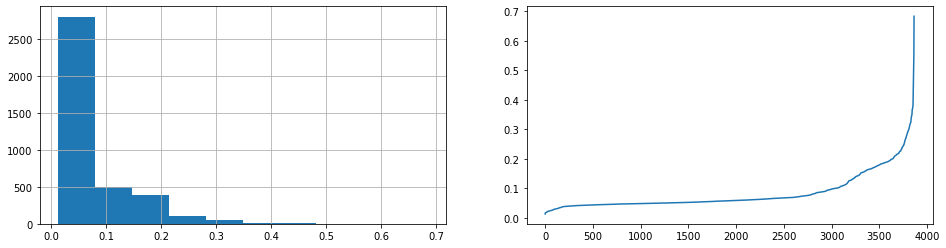

In [17]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
train['y'].hist(ax=axes[0])
axes[1].plot(sorted(train['y']))

<AxesSubplot:xlabel='y', ylabel='Count'>

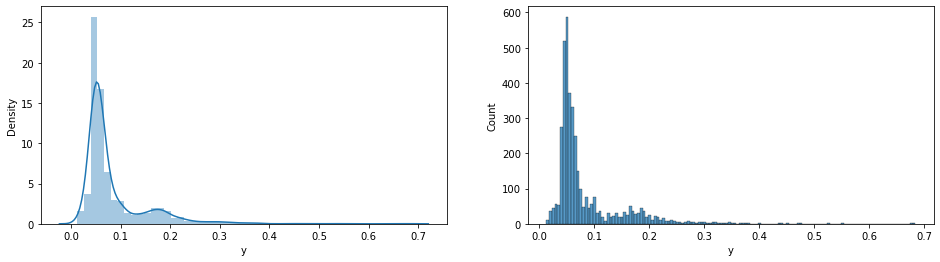

In [18]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
sns.distplot(train.y,ax=axes[0])
sns.histplot(train.y,ax=axes[1])


In [19]:
train_galaxies=set(train['galaxy'].unique())
test_galaxies=set(test['galaxy'].unique())


In [20]:
c = list(train_galaxies.difference(test_galaxies))
print(c)

['NGC 5253', 'Hercules Dwarf', 'Triangulum Galaxy (M33)', 'Tucana Dwarf', 'Andromeda XIX[60]', 'Andromeda XVIII[60]', 'Andromeda XII', 'Andromeda XXIV', 'Andromeda XXII[57]']


In [21]:
df_na=df.copy()

In [22]:
df_na.drop(df_na[df_na['galaxy'].isin(c)].index, inplace=True)

In [23]:
df_na.shape

(4554, 80)

<AxesSubplot:>

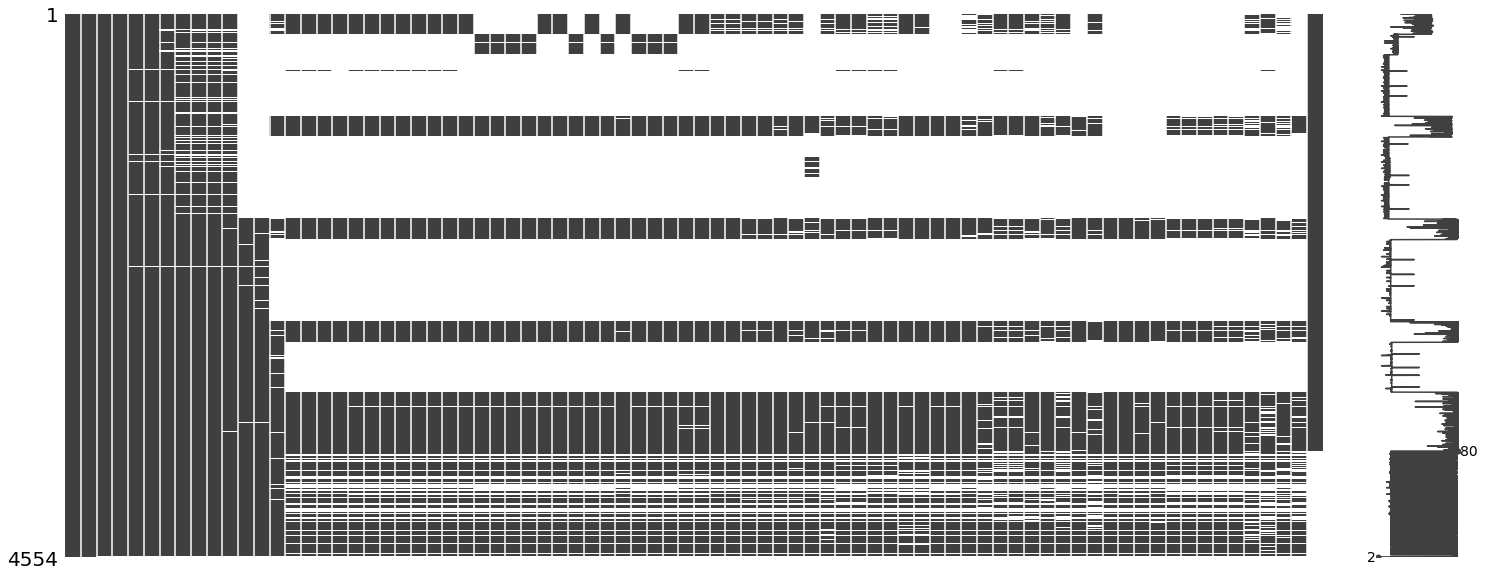

In [24]:
msno.matrix(df_na)

<AxesSubplot:>

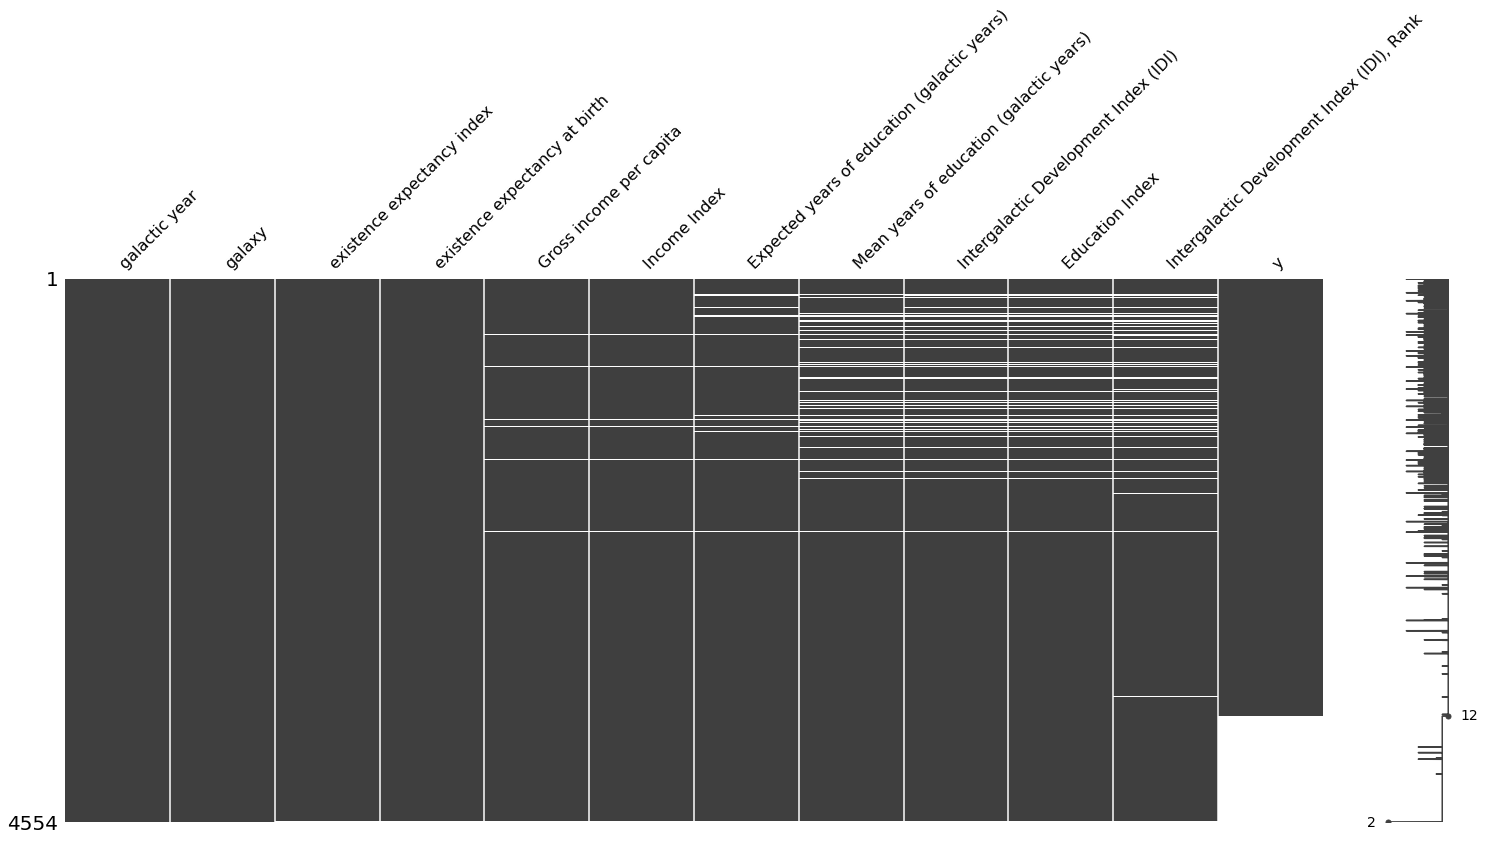

In [25]:
# removing columns with missing values over 10%
columns = list(df_na.iloc[:, 0:11].columns)
columns_y=columns.copy()
columns_y.append('y')

df_na = df_na[columns_y]

msno.matrix(df_na)

In [26]:
df_na.head(7)

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",y
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,NaN,0.052590
1,990025,Camelopardalis B,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,152.522198,0.059868
2,990025,Virgo I,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,209.813266,0.050449
3,990025,UGC 8651 (DDO 181),0.555862,52.333293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049394
5,990025,KKh 060,0.824692,63.887135,28409.062695,0.671697,14.062458,9.978597,0.815264,0.796807,121.839696,0.052871
6,990025,Grus II,0.657457,68.555326,25648.328827,0.745674,15.434546,10.021786,0.662192,0.743891,149.567075,0.052780
7,990025,UGCA 292,0.951043,75.693397,20935.541513,0.947961,14.862880,NaN,NaN,NaN,NaN,0.062652


<AxesSubplot:>

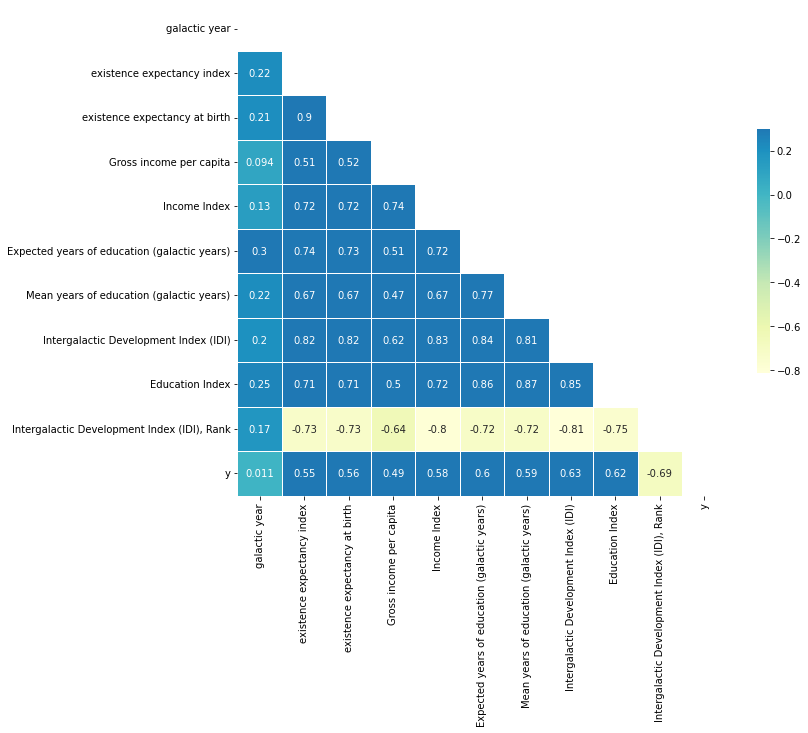

In [27]:

mask = np.triu(np.ones_like(df_na.corr(), dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_na.corr(),annot=True, mask=mask, cmap="YlGnBu", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


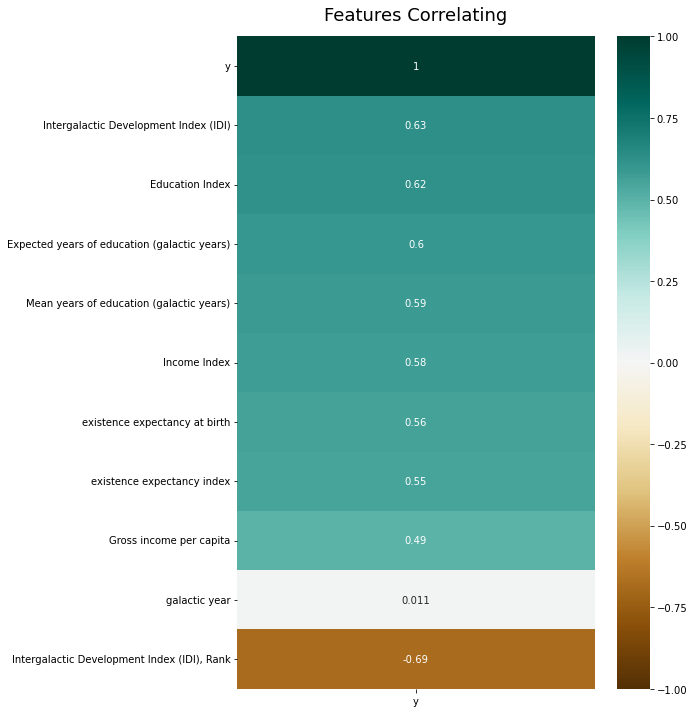

In [28]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_na.corr()[['y']].sort_values(by='y', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating', fontdict={'fontsize':18}, pad=16);

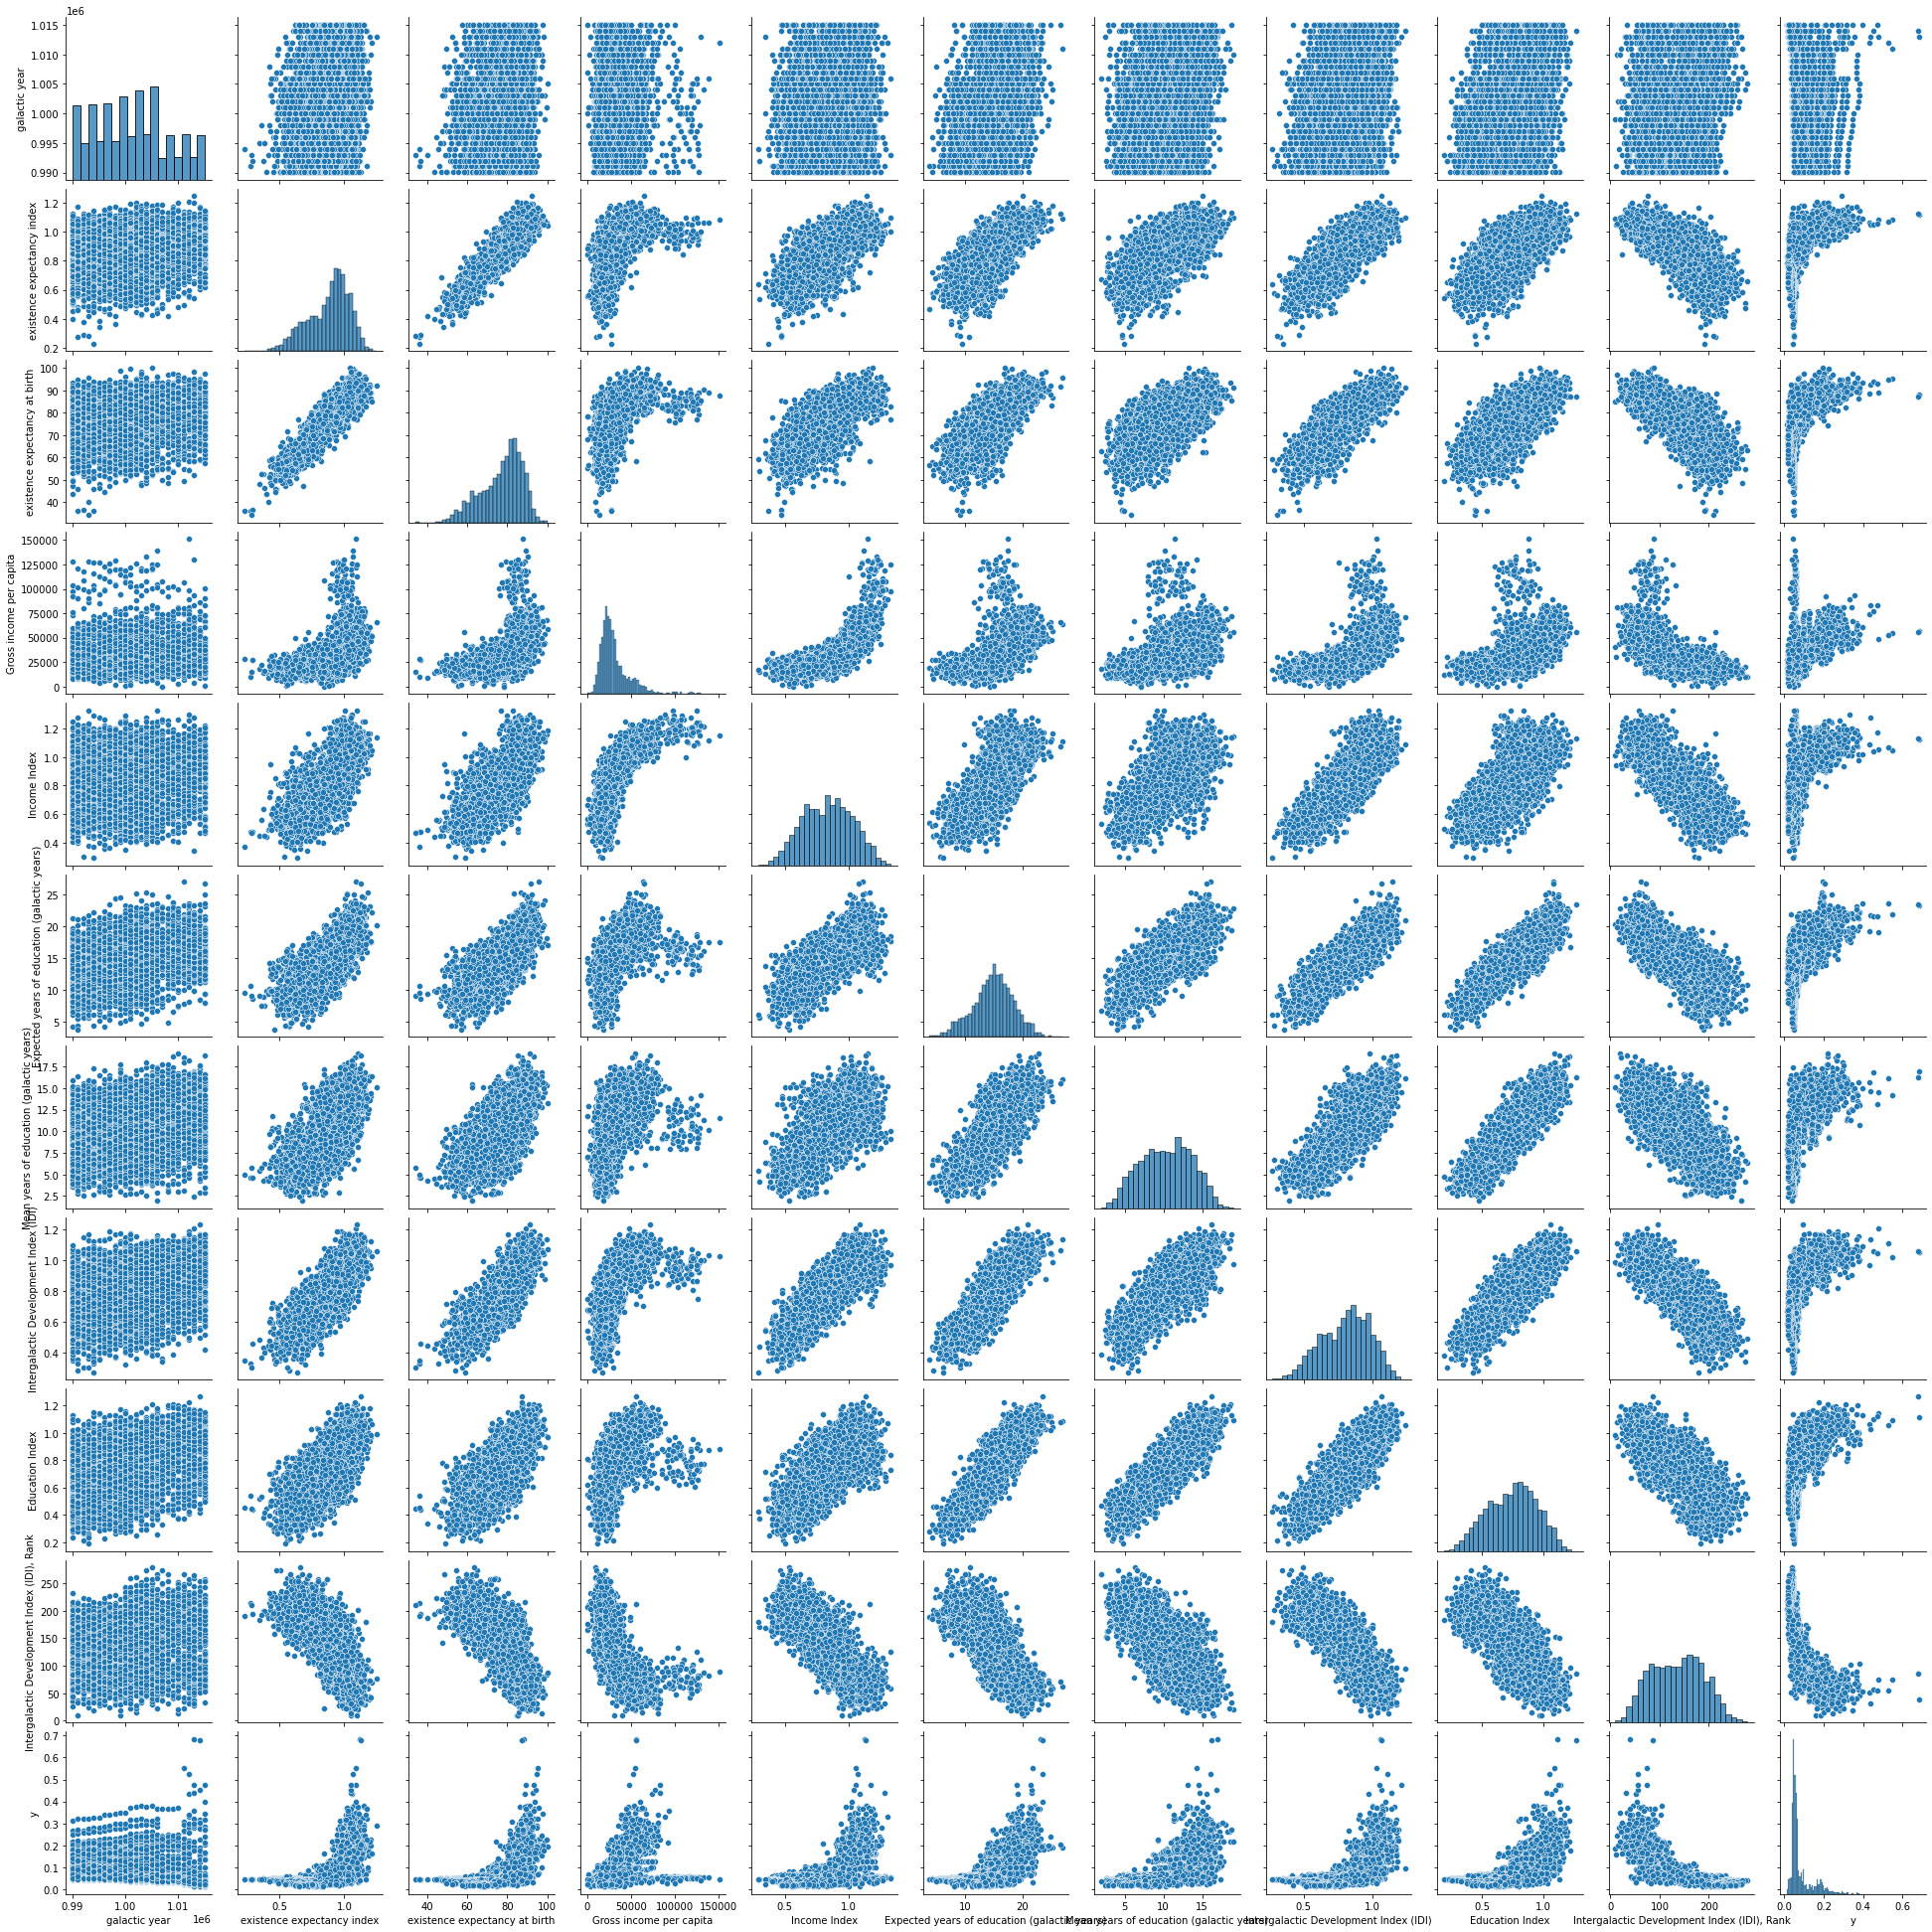

In [29]:
sns.pairplot(df_na.dropna())

In [30]:
def fill_missing(grp):
    res = grp.set_index('galactic year')\
    .interpolate(method='linear',limit=5)\
    .fillna(method='ffill')\
    .fillna(method='bfill')
    del res['galaxy']
    return res

In [31]:
# Grouping by galaxy name and filling missing values
df_new = df_na.groupby(['galaxy']).apply(lambda grp: fill_missing(grp))

df_new=df_new.reset_index()
df_new=pd.concat([df_new.reset_index(drop=True).reset_index(drop=True)],axis=1)

In [32]:
df_new.isnull().sum()

galaxy                                           0
galactic year                                    0
existence expectancy index                       0
existence expectancy at birth                    0
Gross income per capita                          0
Income Index                                     0
Expected years of education (galactic years)     0
Mean years of education (galactic years)         0
Intergalactic Development Index (IDI)            0
Education Index                                  0
Intergalactic Development Index (IDI), Rank     26
y                                                0
dtype: int64

#### "Intergalactic Development Index (IDI), Rank" column still has missing values because we set limits to 5 inside interpolate method. It occurs that this column contains more that 10 missing values in raw. So we'll drop it. And we'll drop year column as it is not correlated to our target and in our case we won't work with time series model.

In [33]:
df_new.drop(['galactic year', 'Intergalactic Development Index (IDI), Rank'],axis=1,inplace=True)

# Recombininig

In [34]:
df_new.isna().sum()

galaxy                                          0
existence expectancy index                      0
existence expectancy at birth                   0
Gross income per capita                         0
Income Index                                    0
Expected years of education (galactic years)    0
Mean years of education (galactic years)        0
Intergalactic Development Index (IDI)           0
Education Index                                 0
y                                               0
dtype: int64

In [35]:
test=df_new[-890:]
test=test.drop(columns='y',axis=1).reset_index(drop=True)

In [36]:
train=df_new[:-890].reset_index(drop=True)

In [37]:
print(train.shape)
print(test.shape)

(3664, 10)
(890, 9)


In [38]:
train

,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,y
0,Andromeda Galaxy (M31),0.759989,72.020628,18445.323465,0.647025,13.819287,11.203402,0.720938,0.774803,0.049214
1,Andromeda Galaxy (M31),0.769566,68.279470,17844.399709,0.678283,15.518075,11.203402,0.720938,0.774803,0.048541
2,Andromeda Galaxy (M31),0.791677,69.154885,17407.794954,0.658309,14.660651,11.203402,0.720938,0.774803,0.048473
3,Andromeda Galaxy (M31),0.822373,74.018880,27287.948235,0.829902,15.874337,11.203402,0.720938,0.774803,0.048130
4,Andromeda Galaxy (M31),0.838323,71.627275,18470.436157,0.578029,14.421358,11.203402,0.720938,0.774803,0.047777
...,...,...,...,...,...,...,...,...,...,...
3659,Sagittarius II,0.910490,82.871395,22272.201748,0.971638,16.465818,11.943569,0.894043,0.794137,0.088618
3660,Sagittarius II,0.961582,78.533785,13884.127671,0.883930,15.087017,12.191054,0.881769,0.886515,0.088676
3661,Sagittarius II,0.924665,81.367167,23683.349145,0.799076,15.494565,12.126043,0.825596,0.840374,0.087208
3662,Sagittarius II,0.985055,83.821992,17738.665774,0.806178,15.363912,10.513604,0.954965,0.938338,0.087036


In [39]:
df = pd.concat([train, test], ignore_index=True, )

In [40]:
df

,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,y
0,Andromeda Galaxy (M31),0.759989,72.020628,18445.323465,0.647025,13.819287,11.203402,0.720938,0.774803,0.049214
1,Andromeda Galaxy (M31),0.769566,68.279470,17844.399709,0.678283,15.518075,11.203402,0.720938,0.774803,0.048541
2,Andromeda Galaxy (M31),0.791677,69.154885,17407.794954,0.658309,14.660651,11.203402,0.720938,0.774803,0.048473
3,Andromeda Galaxy (M31),0.822373,74.018880,27287.948235,0.829902,15.874337,11.203402,0.720938,0.774803,0.048130
4,Andromeda Galaxy (M31),0.838323,71.627275,18470.436157,0.578029,14.421358,11.203402,0.720938,0.774803,0.047777
...,...,...,...,...,...,...,...,...,...,...
4549,"Wolf-Lundmark-Melotte (WLM, DDO 221)",0.714260,70.488919,18333.147138,0.614644,10.674084,4.753269,0.547468,0.328826,NaN
4550,"Wolf-Lundmark-Melotte (WLM, DDO 221)",0.731765,67.006365,15869.737839,0.677069,10.419635,4.673536,0.620506,0.532150,NaN
4551,"Wolf-Lundmark-Melotte (WLM, DDO 221)",0.737634,65.123686,25992.617277,0.602158,10.844885,6.907832,0.490640,0.390699,NaN
4552,"Wolf-Lundmark-Melotte (WLM, DDO 221)",0.771783,62.266666,12143.705835,0.628638,12.182313,7.862855,0.568157,0.462499,NaN


# Linear Regression assumptions

In [41]:
train

,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,y
0,Andromeda Galaxy (M31),0.759989,72.020628,18445.323465,0.647025,13.819287,11.203402,0.720938,0.774803,0.049214
1,Andromeda Galaxy (M31),0.769566,68.279470,17844.399709,0.678283,15.518075,11.203402,0.720938,0.774803,0.048541
2,Andromeda Galaxy (M31),0.791677,69.154885,17407.794954,0.658309,14.660651,11.203402,0.720938,0.774803,0.048473
3,Andromeda Galaxy (M31),0.822373,74.018880,27287.948235,0.829902,15.874337,11.203402,0.720938,0.774803,0.048130
4,Andromeda Galaxy (M31),0.838323,71.627275,18470.436157,0.578029,14.421358,11.203402,0.720938,0.774803,0.047777
...,...,...,...,...,...,...,...,...,...,...
3659,Sagittarius II,0.910490,82.871395,22272.201748,0.971638,16.465818,11.943569,0.894043,0.794137,0.088618
3660,Sagittarius II,0.961582,78.533785,13884.127671,0.883930,15.087017,12.191054,0.881769,0.886515,0.088676
3661,Sagittarius II,0.924665,81.367167,23683.349145,0.799076,15.494565,12.126043,0.825596,0.840374,0.087208
3662,Sagittarius II,0.985055,83.821992,17738.665774,0.806178,15.363912,10.513604,0.954965,0.938338,0.087036


In [42]:
X = train.drop(['galaxy', 'y'], axis=1)
y = train.y

In [43]:
# Add intercept
X_constant = sm.add_constant(X)

lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     377.0
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:31:52   Log-Likelihood:                 5329.6
No. Observations:                3664   AIC:                        -1.064e+04
Df Residuals:                    3655   BIC:                        -1.059e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.1369      0.008    -16.471      0.000      -0.153      -0.121
existence expectancy index                       0.0036      0.015      0.250      0.802      -0.025       0.032
existence expectancy at birth                    0.0008      0.000      3.435      0.001       0.000       0.001
Gross income per capita                       9.669e-07   7.49e-08     12.913      0.000     8.2e-07    1.11e-06
Income Index                                     0.0250      0.010      2.407      0.016       0.005       0.045
Expected years of education (galactic years)     0.0023      0.001      4.135      0.000       0.001       0.003
Mean years of education (galactic years)         0.0026      0.001      4.455      0.000       0.001       0.004
Intergalactic Development Index (IDI)           -0.0054      0.015     -0.358      0.721      -0.035       0.024
Education Index                                  0.0681      0.012      5.667      0.000       0.045       0.092
==============================================================================
Omnibus:                     1742.286   Durbin-Watson:                   0.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20941.734
Skew:                           1.953   Prob(JB):                         0.00
Kurtosis:                      14.042   Cond. No.                     6.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 1 Model Linearity

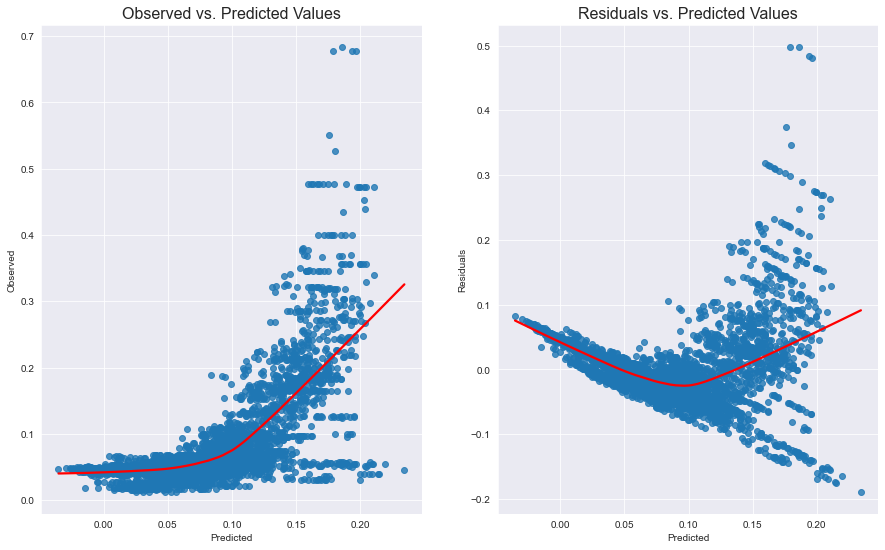

In [44]:
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)   

## 2 Residuals mean

In [45]:
# residual mean approximately 0
lin_reg.resid.mean()

-1.5014665351036757e-13

## 3 Multucolliniarity

In [46]:
# Checking for multucolliniarity

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index
vif,5.808892,5.998196,2.21834,4.50102,4.531833,4.517697,8.133993,6.777123


## 4 Homoscedasticity


 Breusch-Pagan test ----
                                       value
Lagrange multiplier statistic   5.102406e+02
p-value                        4.465474e-105
f-value                         7.391691e+01
f p-value                      2.662562e-113

 Goldfeld-Quandt test ----
                value
F statistic  1.049011
p-value      0.153561

 Residuals plots ----


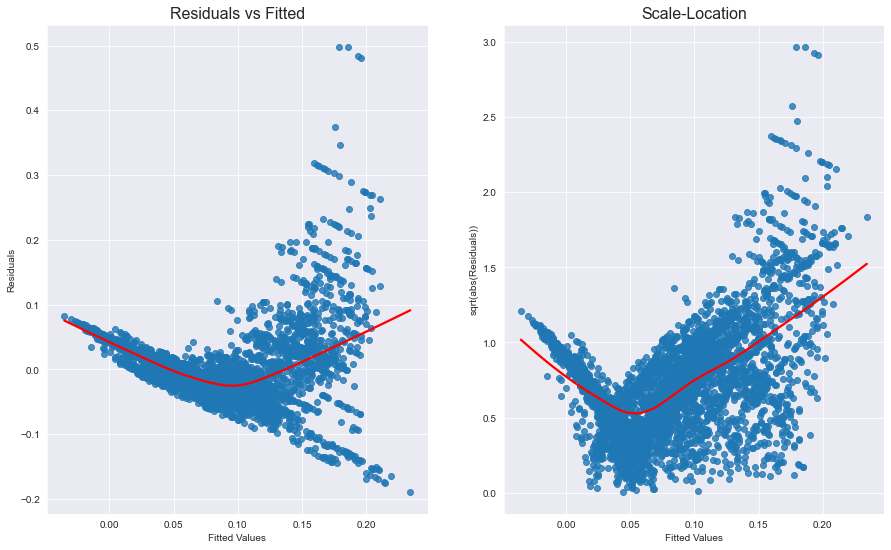

In [47]:
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(lin_reg)

## 5 Autocorrelation

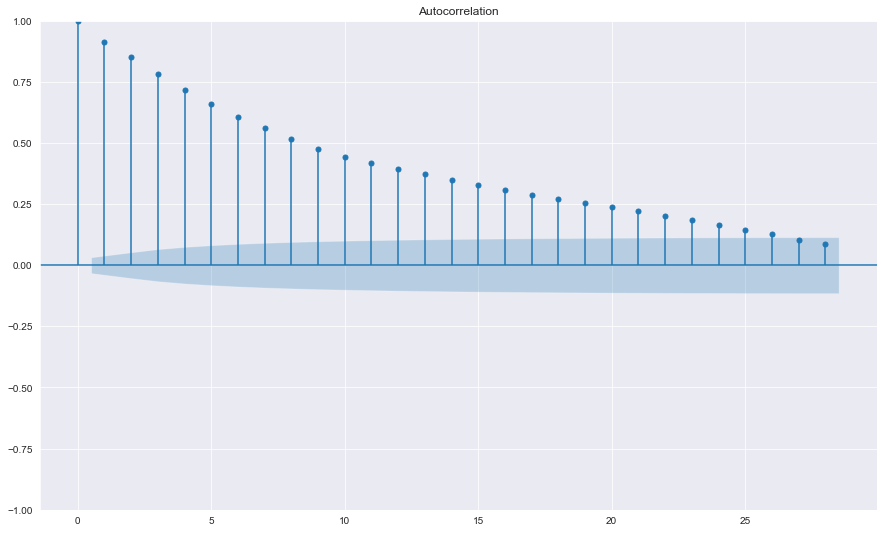

In [48]:
acf = smt.graphics.plot_acf(lin_reg.resid, lags=28, alpha=0.05)
acf.show()

## 6 Residuals normality

Jarque-Bera test ---- statistic: 20941.7341, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.8660, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.4404, p-value: 0.0000
Anderson-Darling test ---- statistic: 86.4767, 5% critical value: 0.7860
If the returned AD statistic is larger than the critical value, then for the 5% significance level, 
the null hypothesis that the data come from the Normal distribution should be rejected. 


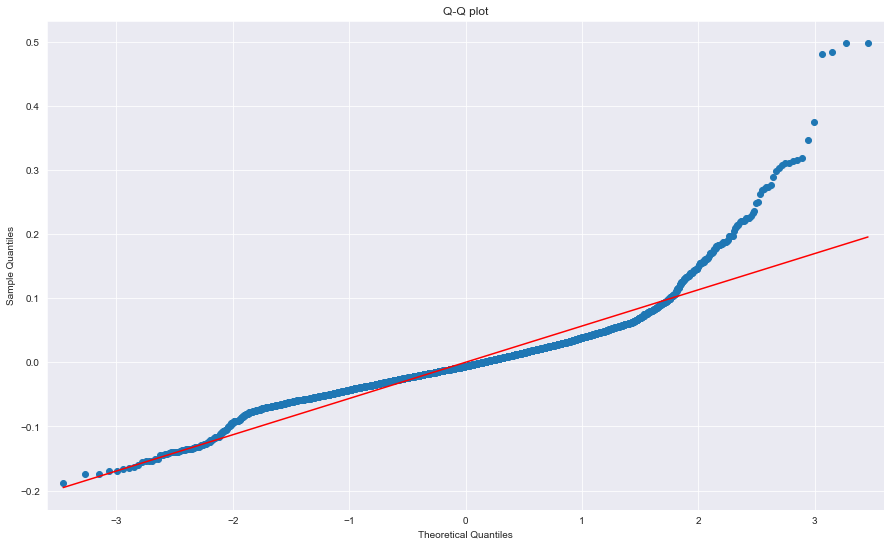

In [49]:
def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, \nthe null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(lin_reg)

## Summary
1) target (y) is not linear func of independent features (X) -

2) residual mean ~ 0 +

3) strong multicolliniarity -

4) no homoscedasticity -

5) DW-test < 2 -> positive autocorrelation -

6) residuals are not normal distributed -

# Data Preprocessing

## Encoding

In [50]:
target_encoder = CatBoostEncoder().fit(train['galaxy'], train['y'])

train['galaxy'] = target_encoder.transform(train['galaxy'])
test['galaxy'] = target_encoder.transform(test['galaxy'])
train.head()

,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,y
0,0.037198,0.759989,72.020628,18445.323465,0.647025,13.819287,11.203402,0.720938,0.774803,0.049214
1,0.037198,0.769566,68.279470,17844.399709,0.678283,15.518075,11.203402,0.720938,0.774803,0.048541
2,0.037198,0.791677,69.154885,17407.794954,0.658309,14.660651,11.203402,0.720938,0.774803,0.048473
3,0.037198,0.822373,74.018880,27287.948235,0.829902,15.874337,11.203402,0.720938,0.774803,0.048130
4,0.037198,0.838323,71.627275,18470.436157,0.578029,14.421358,11.203402,0.720938,0.774803,0.047777


# Modeling

## Train/Test Split of Train Data

In [51]:
X = train.drop(columns=['y'], axis=1)
y = train.y

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=19)


#We'll use robust scaler as we did not remove outliers
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modeling

In [52]:
lr_y_pred = LinearRegression().fit(X_train, y_train).predict(X_test)

xgb_y_pred = xgboost.XGBRegressor(objective='reg:squarederror').fit(X_train, y_train).predict(X_test)

## Evaluation

In [53]:
n=len(y_test)
k=X_test.shape[1]

# LinReg
print('*'*30 +"\nLinear Regression evaluation\n" + '-'*28)

# The coefficient of determination
print("R2: %.4f" % r2_score(y_test, lr_y_pred))

# The adjusted R2
lin_a_r2 = 1 - (1-r2_score(y_test, lr_y_pred))*(n-1)/(n-k-1)
print("Adjusted R2: %.4f" % lin_a_r2)

# The mean squared error
print("RMSE: %.4f" % mean_squared_error(y_test, lr_y_pred, squared=False))

# The mean absolute error
print("MAE: %.4f" % mean_absolute_error(y_test, lr_y_pred))

# XGB
print("\n" + '*'*30 +"\nXGBoost evaluation\n" + '-'*18)
# The coefficient of determination
print("R2: %.4f" % r2_score(y_test, xgb_y_pred))
# The adjusted R2
xgb_a_r2 = 1 - (1-r2_score(y_test, xgb_y_pred))*(n-1)/(n-k-1)
print("Adjusted R2: %.4f" % xgb_a_r2)
# The mean squared error
print("RMSE: %.4f" % mean_squared_error(y_test, xgb_y_pred, squared=False))
# The mean absolute error
print("MAE: %.4f" % mean_absolute_error(y_test, xgb_y_pred))

******************************
Linear Regression evaluation
----------------------------
R2: 0.9082
Adjusted R2: 0.9073
RMSE: 0.0213
MAE: 0.0125

******************************
XGBoost evaluation
------------------
R2: 0.9299
Adjusted R2: 0.9292
RMSE: 0.0186
MAE: 0.0090


## Result

In [54]:
scaler = RobustScaler()
scaled_train_df = scaler.fit_transform(train.drop('y', axis=1))
scaled_test_df = scaler.transform(test) 

In [55]:
y_pred = xgboost.XGBRegressor(objective='reg:squarederror')\
                .fit(scaled_train_df, train['y'])\
                .predict(scaled_test_df)

In [56]:
index = test.index
data = {'index' : index,
        'pred' : y_pred}
submission = pd.DataFrame(data, columns=data.keys(), index=index)
submission.index.name = None
submission.sort_values('index', inplace=True)

In [57]:
submission

,index,pred
0,0,0.084962
1,1,0.086599
2,2,0.085118
3,3,0.088186
4,4,0.077519
...,...,...
885,885,0.088160
886,886,0.085475
887,887,0.085455
888,888,0.089196


## Optimization

In [58]:
submission.head(3)

,index,pred
0,0,0.084962
1,1,0.086599
2,2,0.085118


In [59]:
submission['existence expectancy index'] = test_df['existence expectancy index']

In [60]:
def optimize(df):
    '''Optimizer'''
    def x_below_07_indices(df):
        '''Get indices of 'existence expectancy index' below 0.7
        Args:
            df: Dataframe with 'existence expectancy index' column
        Return s:
            indices
        '''
        indices = df.loc[df['existence expectancy index']<0.7].index
        return indices
    
    y_pred = df['pred']
    
    E = 50000.0
    p = -np.log(y_pred + 0.01)+3.0
    below_07_indices = x_below_07_indices(df)
    
    mask = np.zeros_like(p, dtype=np.float32)
    mask[below_07_indices] = -1.0
    
    data = {}
    data['constraint_coeffs'] = [
                                list(np.ones(len(p), dtype= np.float32)),
                                list(mask)
                                ]
    data['bound'] = [E,-0.1*E]
    data['obj_coeffs'] = list((p**2.0)/1000.0)
    data['num_vars'] = len(p)
    data['num_constraints'] = 2
    
    solver = pywraplp.Solver('simple_min_program', pywraplp.Solver.GLOP_LINEAR_PROGRAMMING)
    x= {}
    optimized_energy_allocations = list()
    for j in range(data['num_vars']):
        x[j] = solver.NumVar(0.0, 100.0,f'x[{j}]')
        
    for i in range(data['num_constraints']):
        constraint_expr = [data['constraint_coeffs'][i][j]*x[j] for j in range(data['num_vars'])]
        solver.Add(sum(constraint_expr)<= data['bound'][i])
        
    print('Number of variables = ', solver.NumVariables())
    print('Number of constraint = ', solver.NumConstraints())
    
    obj_expr = [data['obj_coeffs'][j]*x[j] for j in range(data['num_vars'])]
    solver.Maximize(solver.Sum(obj_expr))
    
    status = solver.Solve()
    
    if status == pywraplp.Solver.OPTIMAL:
        for j in range(data['num_vars']):
            optimized_energy_allocations.append(x[j].solution_value())
        optimized_energy_allocations = np.array(optimized_energy_allocations)
        assert np.sum(optimized_energy_allocations) <= E
        assert np.sum(optimized_energy_allocations[below_07_indices]) >= 0.1*E
        
        print('Constraints are satisfied! \n')
        print(f'Total energy allocation= {np.sum(optimized_energy_allocations)}')
        print('Problem solved in %f milliseconds'% solver.wall_time())
        print('Problem solved in %d iterations'% solver.iterations())
        print('Problem solved in %d branch and bound nodes'% solver.nodes())
        return optimized_energy_allocations
    else:
        print('The problem does not have an optimal solution.')
        return None

In [61]:
optimum_energy_allocations = optimize(submission)
submission['opt_pred'] = optimum_energy_allocations
submission = submission.drop(['existence expectancy index'], axis = 1)

Number of variables =  890
Number of constraint =  2
Constraints are satisfied! 

Total energy allocation= 50000.0
Problem solved in 39.000000 milliseconds
Problem solved in 209 iterations
Problem solved in -1 branch and bound nodes


In [3]:
import session_info


session_info.show()